In [2]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

%matplotlib inline

In [154]:
#train = pd.read_csv('./input/train.csv').drop(columns=['ID'])
train = pd.read_csv('./input/test_for_train.csv').drop(columns=['ID'])

In [155]:
def build_histograms(df):
    df_X = (df.replace(0, np.nan).apply(np.log)**0.5*200).round()
    start = int(df_X.min().min())
    stop = int(df_X.max().max())
    print(start, stop)
    return pd.DataFrame(data={f'bucket{cnt}': (df_X == cnt).sum() for cnt in range(start, stop + 1)})

In [156]:
df_hist = build_histograms(train)

288 910


In [157]:
tsne_res = TSNE(n_components=2, random_state=42).fit_transform(np.log1p(df_hist.values))

In [158]:
FEATURES40 = ['f190486d6', '58e2e02e6', 'eeb9cd3aa', '9fd594eec', '6eef030c1', 
              '15ace8c9f', 'fb0f5dbfe', '58e056e12', '20aa07010', '024c577b9', 
              'd6bb78916', 'b43a7cfd5', '58232a6fb', '1702b5bf0', '324921c7b', 
              '62e59a501', '2ec5b290f', '241f0f867', 'fb49e4212', '66ace2992', 
              'f74e8f13d', '5c6487af1', '963a49cdc', '26fc93eb7', '1931ccfdd', 
              '703885424', '70feb1494', '491b9ee45', '23310aa6f', 'e176a204a', 
              '6619d81fc', '1db387535', 'fc99f9426', '91f701ba2', '0572565c2', 
              '190db8488', 'adb64ff71', 'c47340d97', 'c5a231d81', '0ff32eb98']


In [162]:
def get_int_cols(df):
    return df.columns[df.dtypes == np.int64]

def get_colors(df):
    colors = pd.Series(index=df.columns, data='b')
    colors[FEATURES40] = 'y'
    colors["target"] = 'r'
    colors[get_int_cols(train)] = 'g'
    return colors

In [163]:
from sklearn.cluster import KMeans
num_clusters = 100
estimator = KMeans(n_clusters=num_clusters)
estimator.fit(tsne_res)
label_pred = estimator.labels_

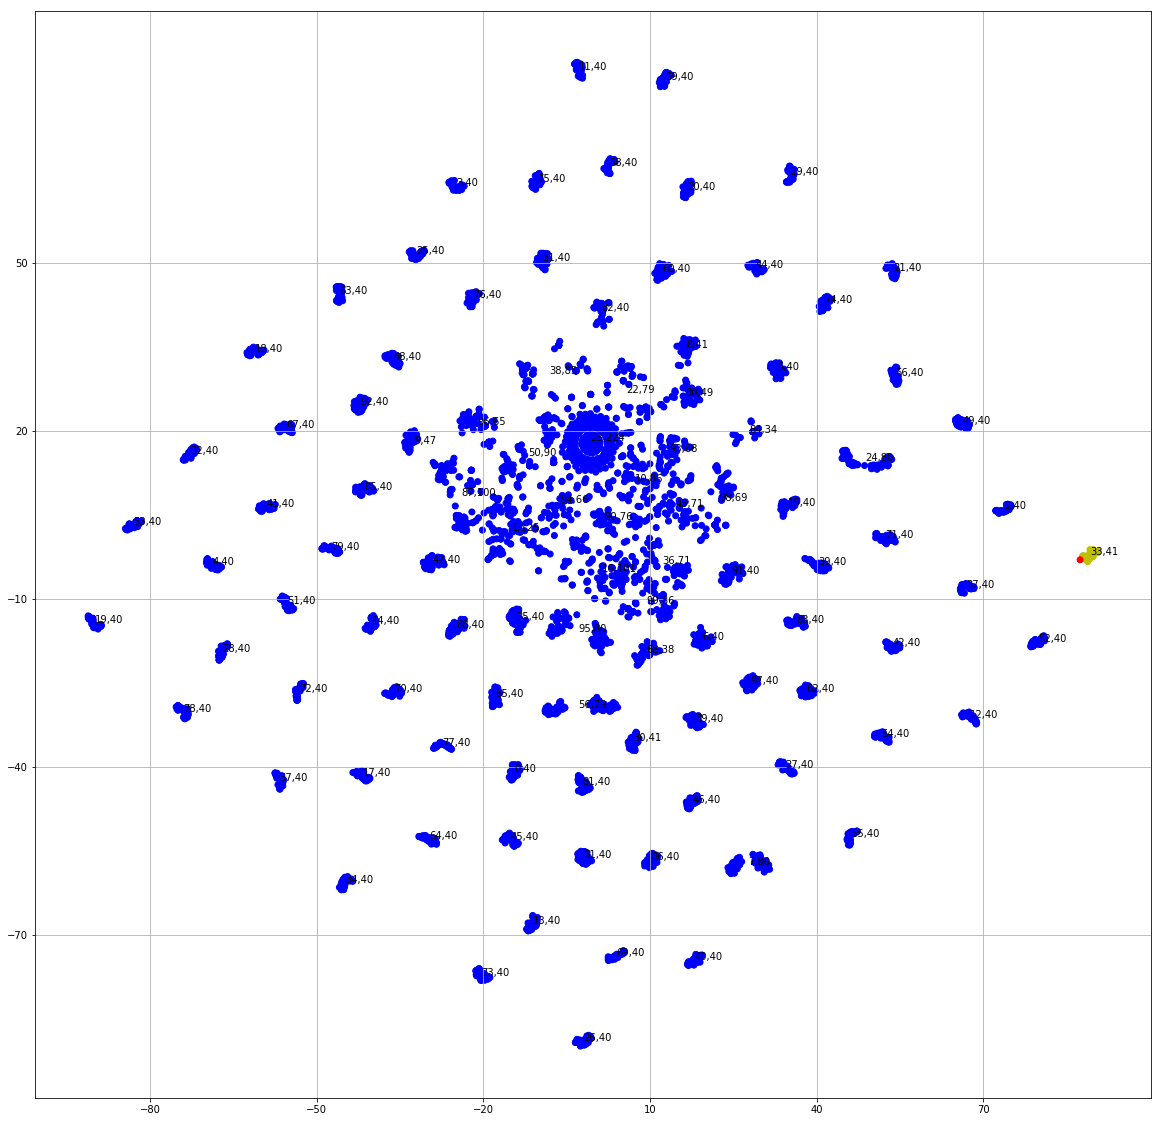

In [164]:
vis_x = tsne_res[:, 0]
vis_y = tsne_res[:, 1]
plt.figure(figsize=(20,20))
plt.xticks(np.arange(-80,100,30))
plt.yticks(np.arange(-100,80,30))
plt.scatter(vis_x, vis_y, c=get_colors(train));
# Red = target, yellow = leak, green = ints, blue = floats
for i in range(num_clusters):
    cen_x = estimator.cluster_centers_[i, 0]; cen_y = estimator.cluster_centers_[i, 1]
    num_sample = len(label_pred[np.where(label_pred==i)])
    plt.text(x = cen_x, y =  cen_y, s = '{:d},{:d}'.format(i, num_sample))
plt.grid()

In [91]:
def build_histograms_row(df):
    df_X = (df.replace(0, np.nan).apply(np.log) * 10).round().T
    start = int(df_X.min().min())
    stop = int(df_X.max().max())
    return pd.DataFrame(data={f'bucket{cnt}': (df_X == cnt).sum() for cnt in range(start, stop + 1)})

In [92]:
giba_rows = [1757, 3809, 511, 3798, 625, 3303, 4095, 1283, 4209, 
             1696, 3511, 816, 245, 1383, 2071, 3492, 378, 2971, 
             2366, 4414, 2790, 3979, 193, 1189, 3516, 810, 4443, 
             3697, 235, 1382, 4384, 3418, 4396, 921, 3176, 650]
def get_colors_row(df):
    colors = pd.Series(index=df.T.columns, data='b')
    colors[giba_rows] = 'y'
    return colors

In [93]:
df_hist_row = build_histograms_row(train)

In [94]:
tsne_res_row = TSNE(n_components=2, verbose=0).fit_transform(np.log1p(df_hist_row.values))

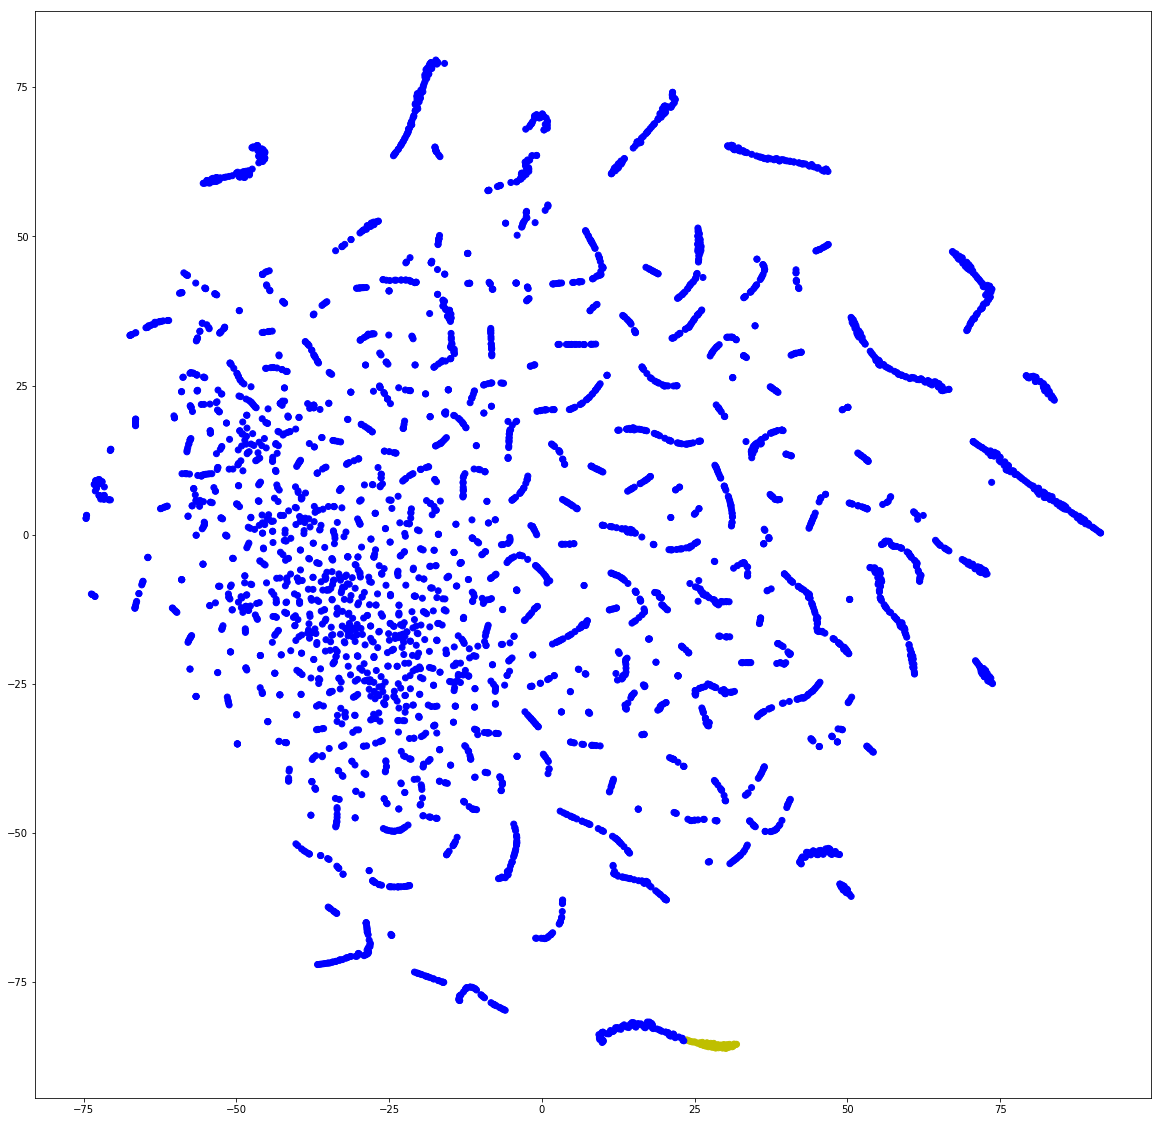

In [95]:
vis_x = tsne_res_row[:, 0]
vis_y = tsne_res_row[:, 1]
plt.figure(figsize=(20,20))
plt.scatter(vis_x, vis_y, c=get_colors_row(train));